# ADVANCED FINANCIAL FRAUD DETECTION MODEL

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
data= pd.read_csv("creditcard_2023.csv")

# Data Cleaning

In [31]:
data.index = range(1, len(data)+1)
data.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
2,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
3,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
4,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
5,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 1 to 568630
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [6]:
data.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
data.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486122,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


# Data Visualization

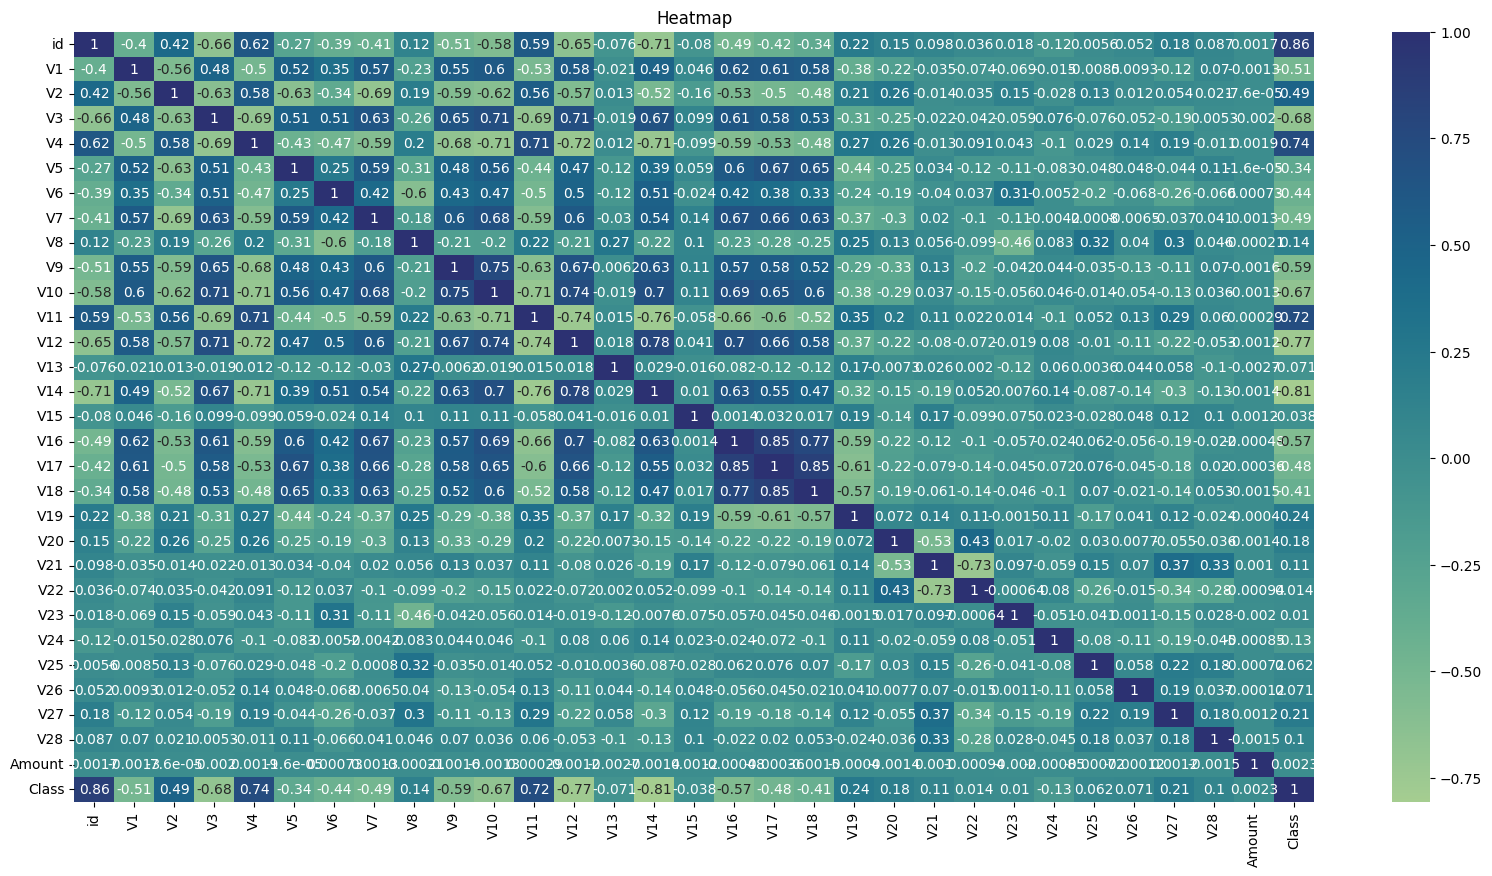

In [5]:
#generating a heatmap to examine the correlations between the classes
heatmap = plt.figure(figsize=[20,10])
sns.heatmap(data.corr(),cmap='crest',annot=True)
plt.title("Heatmap")
plt.show()

<Axes: >

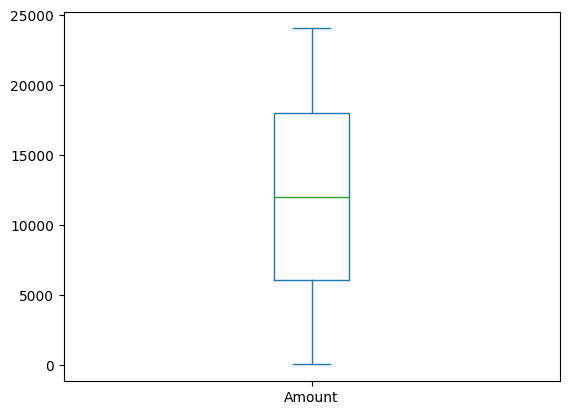

In [15]:
data['Amount'].plot.box()

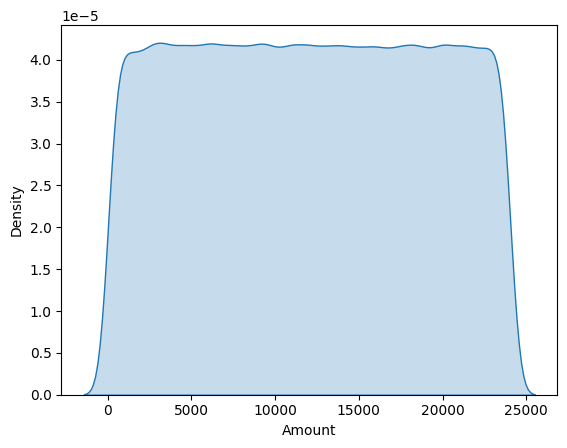

In [7]:
sns.kdeplot(data=data['Amount'],fill=True)
plt.show()

In [4]:
x= data.drop(['id','Class'],axis=1, errors='ignore')
y=data['Class']

In [43]:
print(x.columns.tolist())

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


In [26]:
print('Shape of x',x.shape)
print('Shape of y',y.shape)

Shape of x (568630, 29)
Shape of y (568630,)


In [16]:
print(y.value_counts(normalize=True)*100)

Class
0    50.0
1    50.0
Name: proportion, dtype: float64


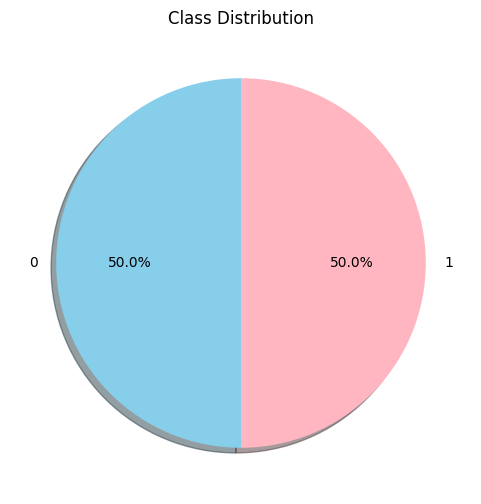

In [25]:
class_distribution= y.value_counts()
plt.figure(figsize=(6,6))
plt.pie(class_distribution,labels=class_distribution.index,autopct='%1.1f%%',startangle=90,colors=['skyblue','lightpink'],shadow=True,)
plt.title('Class Distribution')
plt.show()

In [7]:
#splitting the data into two parts independent(x) and dependent(y)
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size= 0.2, random_state= 42)

In [44]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled= scaler.transform(x_test)

In [35]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(454904, 29)
(113726, 29)
(454904,)
(113726,)


In [5]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression(max_iter=10000)
lr.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,10000
,multi_class,'deprecated'


In [5]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
def model_eval(actual,predicted):
    acc_score = accuracy_score(actual,predicted)
    conf_matrix = confusion_matrix(actual,predicted)
    class_rep = classification_report(actual,predicted)
    print('Model Acurracy is:', round(acc_score,2))
    print(conf_matrix)
    print(class_rep)

In [7]:
y_pred_train=lr.predict(x_train)
model_eval(y_train,y_pred_train)

Model Acurracy is: 0.96
[[222667   4898]
 [ 11065 216274]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97    227565
           1       0.98      0.95      0.96    227339

    accuracy                           0.96    454904
   macro avg       0.97      0.96      0.96    454904
weighted avg       0.97      0.96      0.96    454904



In [70]:
y_pred = lr.predict(x_test)
model_eval(y_test,y_pred)

Model Acurracy is: 0.97
[[55492  1258]
 [ 2700 54276]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     56750
           1       0.98      0.95      0.96     56976

    accuracy                           0.97    113726
   macro avg       0.97      0.97      0.97    113726
weighted avg       0.97      0.97      0.97    113726



In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier(random_state=42)
dt.fit(x_train,y_train)

In [9]:
y_pred_dt_train= dt.predict(x_train)
model_eval(y_train,y_pred_dt_train)

Model Acurracy is: 1.0
[[227565      0]
 [     0 227339]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227565
           1       1.00      1.00      1.00    227339

    accuracy                           1.00    454904
   macro avg       1.00      1.00      1.00    454904
weighted avg       1.00      1.00      1.00    454904



In [ ]:
y_pred_dt = dt.predict(x_test)
model_eval(y_test,y_pred_dt)

Model Acurracy is: 1.0
[[56593   157]
 [   56 56920]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [10]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf_train=rf.predict(x_train)
model_eval(y_train,y_pred_rf_train)

Model Acurracy is: 1.0
[[227565      0]
 [     0 227339]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227565
           1       1.00      1.00      1.00    227339

    accuracy                           1.00    454904
   macro avg       1.00      1.00      1.00    454904
weighted avg       1.00      1.00      1.00    454904



In [11]:
y_pred_rf= rf.predict(x_test)
model_eval(y_test,y_pred_rf)

Model Acurracy is: 1.0
[[56735    15]
 [    0 56976]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [8]:
import xgboost as xgb
xgclf= xgb.XGBRFClassifier()
xgclf.fit(x_train,y_train)
pred_xgb_train=xgclf.predict(x_train)
model_eval(y_train,pred_xgb_train) 

Model Acurracy is: 0.97
[[223577   3988]
 [  9929 217410]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97    227565
           1       0.98      0.96      0.97    227339

    accuracy                           0.97    454904
   macro avg       0.97      0.97      0.97    454904
weighted avg       0.97      0.97      0.97    454904



In [13]:
pred_xgb_test = xgclf.predict(x_test)
model_eval(y_test,pred_xgb_test)

Model Acurracy is: 0.97
[[55726  1024]
 [ 2449 54527]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     56750
           1       0.98      0.96      0.97     56976

    accuracy                           0.97    113726
   macro avg       0.97      0.97      0.97    113726
weighted avg       0.97      0.97      0.97    113726



In [9]:
from sklearn.model_selection import RandomizedSearchCV
param_xgb={
    'n_estimators':[50,100,150,200,300,400],
    'learning_rate':[0.01,0.1,0.2,0.3],
    'max_depth':[3,4,5,6]
}
xgb_clf = RandomizedSearchCV(
    xgclf,
    param_distributions=param_xgb,
    n_iter=20,
    scoring="accuracy",
    n_jobs = -1,
    cv=5,
verbose =1,
random_state=42
)
xgb_clf.fit(x_train,y_train)
print("Best Parameter:",xgb_clf.best_params_)
print("Best CV Score:",xgb_clf.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameter: {'n_estimators': 300, 'max_depth': 6, 'learning_rate': 0.01}
Best CV Score: 0.969747464949773


In [17]:
!pip install kafka-python

In [1]:
!pip install pyspark kafka-python

In [ ]:
from kafka.admin import KafkaAdminClient, NewTopic
admin_client = KafkaAdminClient(
    bootstrap_servers="192.168.29.111:9092",
    client_id='jupyter-client'
)

topic = NewTopic( name="test-topic", num_partitions=1,replication_factor=1)
admin_client.create_topics(new_topics=[topic], validate_only=False)

In [6]:
topics = admin_client.list_topics()
print("Available Topics:",topics)

Available Topics: ['Fraud_Detection', 'test-topic']


In [7]:
#creating producer in python
from kafka import KafkaProducer
import json 
import time

#intializing producer 
producer=KafkaProducer(bootstrap_servers="192.168.29.111:9092",
                      value_serializer=lambda x:json.dumps(x).encode('utf-8'))



In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import from_json, col
from pyspark.sql.types import StructType, StringType, DoubleType

spark = SparkSession.builder \
        .appName("Fraud_Detection") \
        .getOrCreate()

schema= StructType() \
.add("id",DoubleType()) \
.add("amount",DoubleType()) 

df = spark.readStream \
.format("kafka") \
.option("kafka.bootstrap.servers","192.168.29.111:9092") \
.option("subscribe","data") \
.load()

transactions= df.selectExpr("CAST(value AS STRING)") \
.select(from_json(col("class"),schema).alias("data")) \
.select("data.*")

In [ ]:
fraudulent = transactions.filter(col("amount") > 10000)

In [ ]:
import smtplip
from email.mime.text import MIMEText
def send_email_alert(data):
    sender = "alert@bank.com"
    receiver = "security_team@bank.com"
    subject = "Fraudulent Transaction Detected"
    body = f"Transaction {data['id']} by user {data['id']}" \
           f"of amount {data['amount']} looks suspecious."

In [ ]:
msg = MIMEText(body)
msg["Subject"] = subject
msg["From"] = sender
msg["To"] = receiver

try: 
    with smtplib.SMTP("smtp.gmail.com", 587) as server:
        server.starttls()
        server.login("user_email@gmail.com","user_app_password")
        server.sendmail(sender, receiver, msg.as_string())
        print("Alert sent successfully!")
except Exceptation as e:
    print("Error sending mail:", e)

In [ ]:
def process_batch(df, epoch_id):
    rows = df.collect()
    for row in rows:
        data = row.asDict()
        send_email_alert(data)


fraudulent.writeStream \
.foreachBatch(process_batch)\
.start() \
.awaitTermination()